# Impor library

In [1]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA

# Impor data

In [2]:
url = 'https://raw.githubusercontent.com/afiqilyasakmal/european-investment-management/main/data/european-investment-management-train.csv'
df = pd.read_csv(url)
df.head()

,ticker,category,dividend_frequency,equity_style,equity_size,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,...,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down,rating
0,0P000153IG,Global Flex-Cap Equity,NaN,Value,Large,248.25,10.66,1.00,0.92,6.19,...,14.75,1.85,3.86,8.01,-8.18,-4.63,NaN,16,6,3.0
1,F00000OUR6,US Mid-Cap Equity,Annually,Blend,Medium,124.69,23.06,1.97,1.70,12.07,...,8.64,9.40,6.72,9.26,-6.20,-4.92,9.93,16,7,3.0
2,F00000OTTT,Asia-Pacific ex-Japan Equity,Annually,Growth,Large,322.70,27.99,3.04,2.71,10.35,...,12.53,6.06,7.64,7.34,-10.01,-10.82,9.13,16,7,4.0
3,F000005K32,US Large-Cap Blend Equity,Annually,Value,Large,229.67,17.19,1.77,0.75,6.52,...,8.15,8.10,5.64,7.76,-5.85,-7.07,5.21,17,6,2.0
4,F00000ZCZC,Europe Mid-Cap Equity,NaN,Growth,Medium,111.36,12.15,1.01,0.62,3.54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,4,2.0


# Preprocessing data

## Eliminasi fitur yang tidak diperlukan

In [3]:
# drop ticker
df = df.drop(columns=['ticker'])
df

,category,dividend_frequency,equity_style,equity_size,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,dividend_yield_factor,...,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down,rating
0,Global Flex-Cap Equity,NaN,Value,Large,248.25,10.66,1.00,0.92,6.19,4.13,...,14.75,1.85,3.86,8.01,-8.18,-4.63,NaN,16,6,3.0
1,US Mid-Cap Equity,Annually,Blend,Medium,124.69,23.06,1.97,1.70,12.07,1.30,...,8.64,9.40,6.72,9.26,-6.20,-4.92,9.93,16,7,3.0
2,Asia-Pacific ex-Japan Equity,Annually,Growth,Large,322.70,27.99,3.04,2.71,10.35,0.97,...,12.53,6.06,7.64,7.34,-10.01,-10.82,9.13,16,7,4.0
3,US Large-Cap Blend Equity,Annually,Value,Large,229.67,17.19,1.77,0.75,6.52,2.73,...,8.15,8.10,5.64,7.76,-5.85,-7.07,5.21,17,6,2.0
4,Europe Mid-Cap Equity,NaN,Growth,Medium,111.36,12.15,1.01,0.62,3.54,2.86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22415,Europe ex-UK Small/Mid-Cap Equity,Annually,Growth,Small,34.41,19.31,1.60,0.94,4.75,3.66,...,12.85,0.91,2.66,8.59,-2.74,0.30,13.99,18,5,4.0
22416,UK Equity Income,Quarterly,Value,Medium,147.61,9.63,0.90,0.46,3.72,7.97,...,11.71,-5.10,-1.47,4.91,-3.77,0.77,6.85,14,9,2.0
22417,Global Large-Cap Blend Equity,Annually,Blend,Large,280.58,23.77,1.92,1.54,9.76,2.16,...,11.60,4.26,0.27,9.79,-6.47,-5.07,6.86,18,5,3.0
22418,UK Small-Cap Equity,Annually,Growth,Small,-125.83,12.71,1.60,1.01,5.41,1.41,...,13.55,-4.49,-0.16,2.05,1.78,6.07,-4.95,17,6,4.0


In [4]:
# metrik utama yang digunakan
metrics_list = ["roa", "roic", "roe"]
df = df[metrics_list]
df.head(5)

,roa,roic,roe
0,6.38,11.80,14.04
1,7.36,11.33,14.61
2,7.83,11.62,16.35
3,4.68,8.65,17.51
4,1.86,2.02,7.77


## Menangani missing value

In [5]:
description = df.describe()

# Cek missing value
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

description, missing_values.sort_values(ascending=False), missing_percentage.sort_values(ascending=False)

(                roa          roic           roe
 count  22211.000000  21027.000000  22175.000000
 mean       6.028149     10.392178     16.106231
 std        2.969881      4.780655      6.858019
 min      -30.770000    -68.990000    -37.120000
 25%        4.330000      8.020000     11.990000
 50%        6.350000     10.890000     16.320000
 75%        7.850000     13.110000     20.260000
 max       16.550000     69.050000     43.480000,
 roic    1393
 roe      245
 roa      209
 dtype: int64,
 roic    6.213202
 roe     1.092774
 roa     0.932203
 dtype: float64)

## Distribusi fitur dan cek indeks skewness

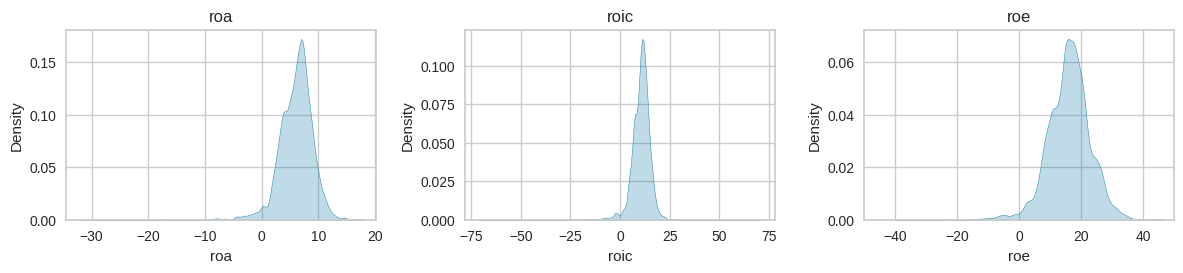

In [6]:
# Setel ukuran gambar
plt.figure(figsize=(12, 10))

columns = ["roa", "roic", "roe"]

# Loop melalui setiap kolom dan buat KDE plot
for column in columns:
    plt.subplot(4, 3, columns.index(column) + 1)
    sns.kdeplot(df[column], fill=True)
    plt.title(column)

# Setel rentang x label
plt.xlim(-50, 50)

# Tampilkan plot
plt.tight_layout()
plt.show()

In [7]:
skewness = df.skew(axis=0)

print(f"Indeks skewness tiap kolom:\n{skewness}")

Indeks skewness tiap kolom:
roa    -1.335890
roic   -1.766279
roe    -0.423621
dtype: float64


## Imputasi data berdasarkan indeks skewness

In [8]:
df['roic'] = df['roic'].fillna(df['roic'].median())
df['roe'] = df['roe'].fillna(df['roe'].mean())
df['roa'] = df['roa'].fillna(df['roa'].median())
df.shape

<ipython-input-8-75c81a51baaa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['roic'] = df['roic'].fillna(df['roic'].median())
<ipython-input-8-75c81a51baaa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['roe'] = df['roe'].fillna(df['roe'].mean())
<ipython-input-8-75c81a51baaa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

(22420, 3)

Pada bagian data preprocessing,threshold ditetapkan sebesar 50%. Artinya, seluruh kolom dengan missing values di atas 50%, akan langsung di-drop.

Selain itu, dilakukan imputasi data (dengan nilai mean atau median) tergantung pada nilai indeks skewness-nya. Fitur dengan indeks skewness yang lebih kecil dari -1 atau lebih besar dari +1 akan diimputasi dengan median, sedangkan jika tidak akan diimputasi dengan mean.

In [9]:
# Variabel untuk outliers
Q3 = df.quantile(0.75)
Q1 = df.quantile(0.25)
IQR = Q3-Q1

In [10]:
outliers_mask = pd.DataFrame(False, index=df.index, columns=df.columns)

for col in df.select_dtypes(np.number).columns:
    outliers_mask[col] = ((df[col] < (Q1[col] - 1.5 * IQR[col])) | (df[col] > (Q3[col] + 1.5 * IQR[col])))

# Drop baris yang mengandung outliers
df_preprocessed = df[~outliers_mask.any(axis=1)]
df_preprocessed.shape

(21324, 3)

## Standarisasi

Persebaran data sebelum distandarisasi (lihat nilai sumbunya)

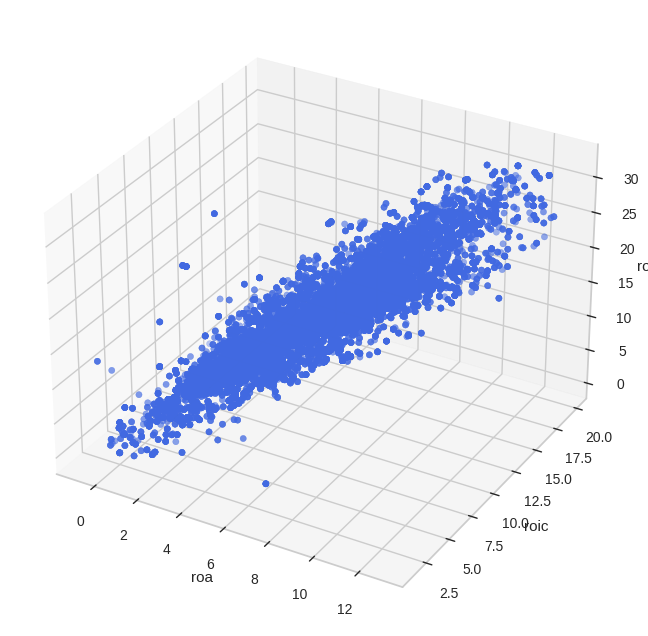

In [11]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = list(df_preprocessed.iloc[:,0])
y = list(df_preprocessed.iloc[:,1])
z = list(df_preprocessed.iloc[:,2])

column_names = df_preprocessed.columns
ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])

ax.scatter(x, y, z, c='royalBlue', marker='o')


plt.show()

In [12]:
from sklearn.preprocessing import OneHotEncoder

# Melakukan standarisasi variabel numerikal
scaler = StandardScaler()

data_final_preprocessed = scaler.fit_transform(df_preprocessed)
data_final_preprocessed = pd.DataFrame(data_final_preprocessed, columns=metrics_list)

data_final_preprocessed.shape, data_final_preprocessed.head(), data_final_preprocessed.shape, data_final_preprocessed.columns

((21324, 3),
         roa      roic       roe
 0  0.066616  0.327124 -0.414794
 1  0.486796  0.184169 -0.315792
 2  0.688311  0.272375 -0.013577
 3 -0.662268 -0.630977  0.187899
 4 -1.871357 -2.647552 -1.503810,
 (21324, 3),
 Index(['roa', 'roic', 'roe'], dtype='object'))

Setelah distandarisasi, data menjadi:

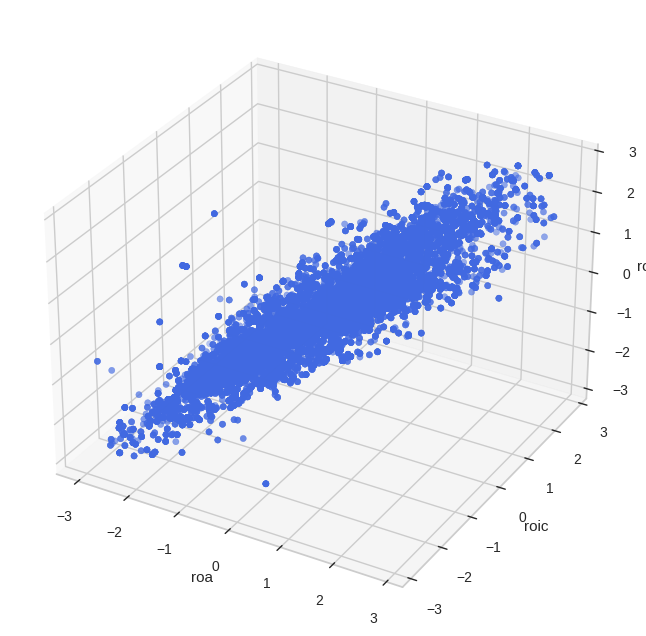

In [13]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = list(data_final_preprocessed.iloc[:,0])
y = list(data_final_preprocessed.iloc[:,1])
z = list(data_final_preprocessed.iloc[:,2])

column_names = data_final_preprocessed.columns
ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])

ax.scatter(x, y, z, c='royalBlue', marker='o')


plt.show()

# Membangun model

## K-Means

### Pembuatan model

For n_clusters = 3 The average silhouette_coefficient is : 0.42203519103801523
For n_clusters = 4 The average silhouette_coefficient is : 0.3588428120601549
For n_clusters = 5 The average silhouette_coefficient is : 0.34266223189144746
For n_clusters = 6 The average silhouette_coefficient is : 0.36213402564645464
For n_clusters = 7 The average silhouette_coefficient is : 0.3253136911319464
For n_clusters = 8 The average silhouette_coefficient is : 0.3244122606670274
For n_clusters = 9 The average silhouette_coefficient is : 0.30516438949917707
jumlah cluster terbaik : 3, silhoutte score terbaik: 0.42203519103801523


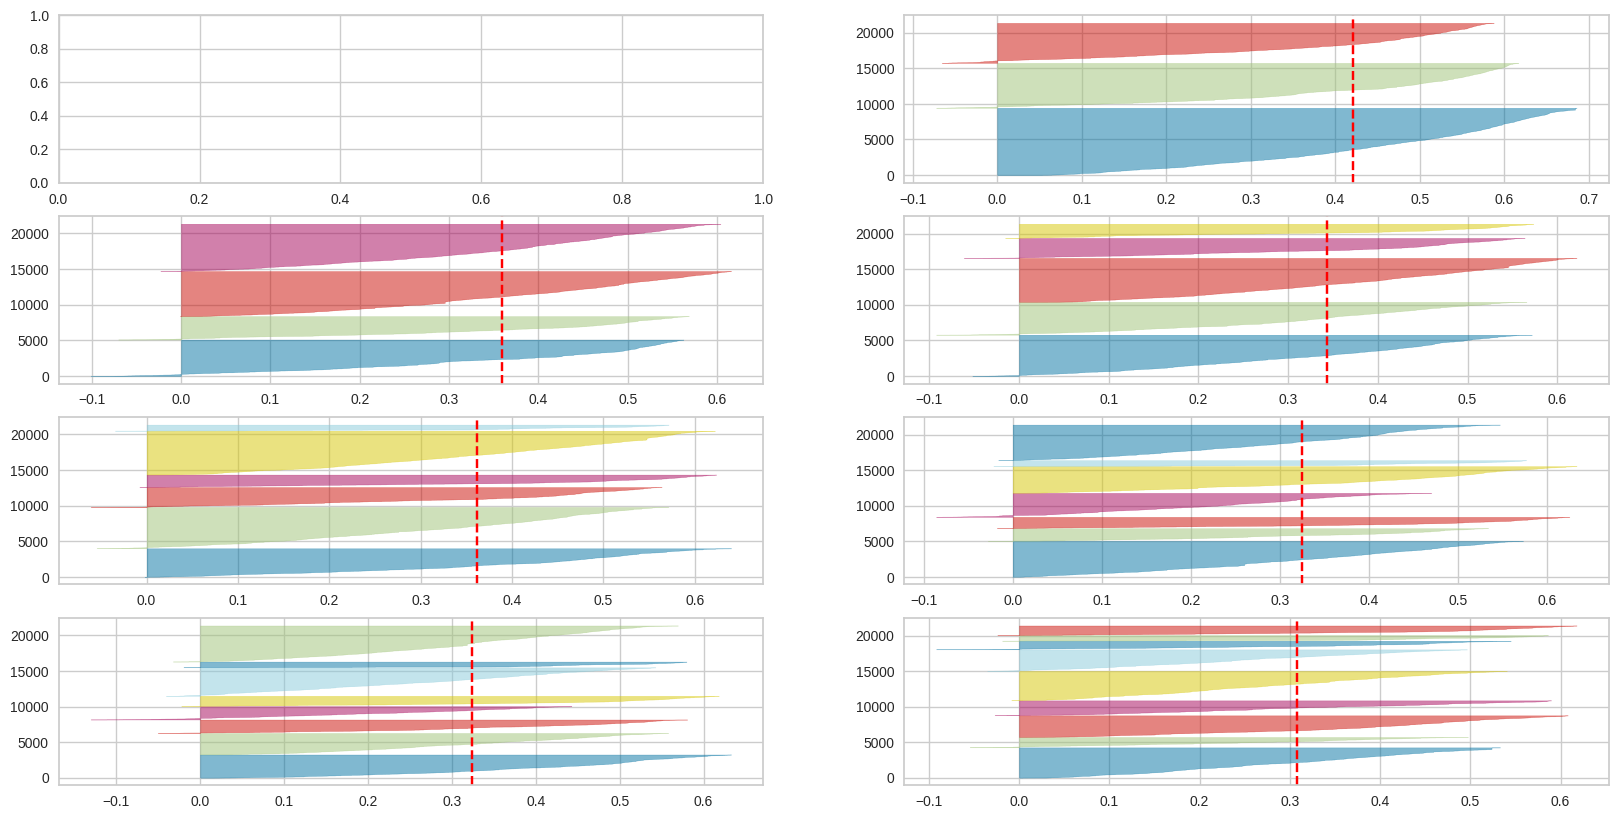

In [14]:
num_of_cluster = [3, 4, 5, 6, 7, 8, 9]

fig, ax = plt.subplots(4, 2, figsize=(20,10))

silhouette_scores = {}

for k in num_of_cluster:
    # Bikin kmeans untuk k cluster yang berbeda
    clusterer = KMeans(n_clusters = k, n_init=10)

    # Membuat silhoutte diagram
    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(data_final_preprocessed)

    # Menghitung silhoutte score
    cluster_labels = clusterer.fit_predict(data_final_preprocessed)
    silhouette_avg = silhouette_score(data_final_preprocessed, cluster_labels)
    silhouette_scores[k] = silhouette_avg

    print(
        "For n_clusters =",
        k,
        "The average silhouette_coefficient is :",
        silhouette_avg,
    )

best_num_clusters = max(silhouette_scores, key=silhouette_scores.get)
best_silhouette_score = silhouette_scores[best_num_clusters]

print(f"jumlah cluster terbaik : {best_num_clusters}, silhoutte score terbaik: {best_silhouette_score}")

In [15]:
kmeans = KMeans(n_clusters=best_num_clusters)

cluster_assignment = kmeans.fit_predict(data_final_preprocessed)
data_with_clusters = pd.DataFrame(data_final_preprocessed, columns=data_final_preprocessed.columns)
data_with_clusters['Clusters'] = cluster_assignment
data_with_clusters.head(10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,roa,roic,roe,Clusters
0,0.066616,0.327124,-0.414794,2
1,0.486796,0.184169,-0.315792,2
2,0.688311,0.272375,-0.013577,2
3,-0.662268,-0.630977,0.187899,2
4,-1.871357,-2.647552,-1.503810,0
5,0.139504,0.038173,-0.326214,2
6,1.571546,1.263934,0.590853,1
7,0.611135,0.546118,0.530062,2
8,0.259556,0.187210,0.174004,2
9,-0.289251,-0.430232,-0.322740,2


----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


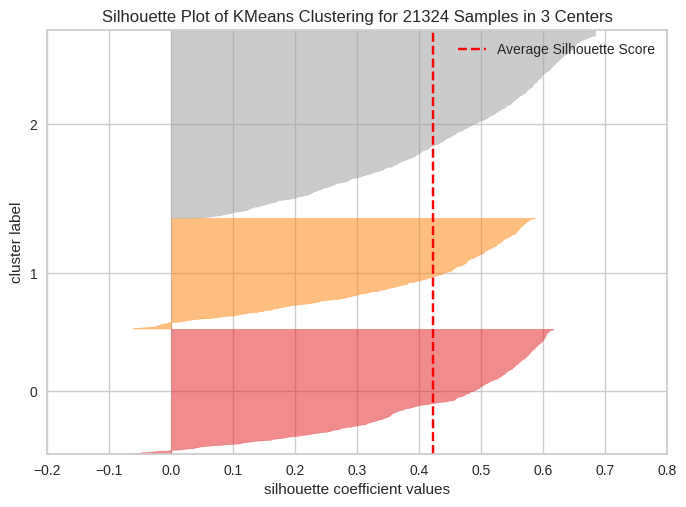

----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


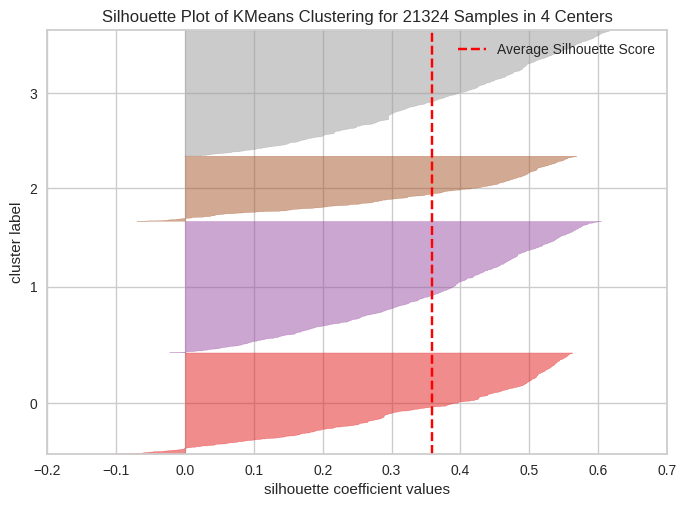

In [16]:
clusters = [3, 4]

for cluster in clusters:

    print('-'*100)

    # Mendefinisikan model
    kmeans = KMeans(n_clusters = cluster, random_state=0)

    # Mempass model ke visualizer
    visualizer = SilhouetteVisualizer(kmeans)

    # Fit data
    visualizer.fit(data_final_preprocessed)

    # Menunjukkan chart
    visualizer.poof()

----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


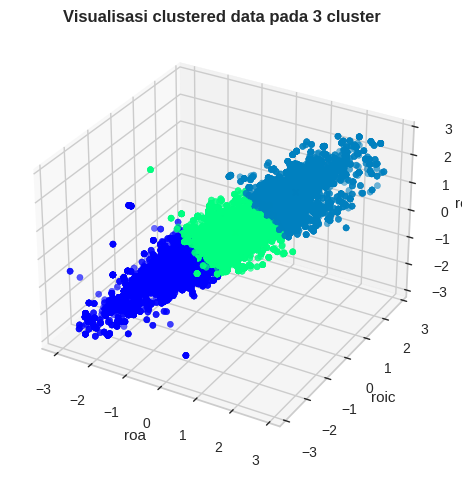

----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


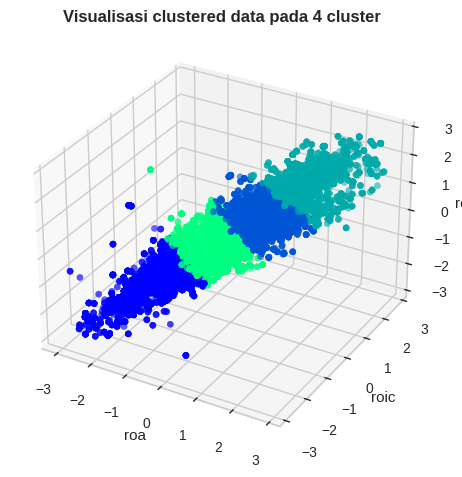

In [17]:
clusters = [3,4]

for cluster in clusters:

    print('-'*100)

    kmeans = KMeans(n_clusters= cluster, random_state=0).fit(data_final_preprocessed)

    # Definisikan cluster center
    cluster_centers = kmeans.cluster_centers_
    C1 = cluster_centers[:, 0]
    C2 = cluster_centers[:, 1]
    C3 = cluster_centers[:, 2]


    # Buat plot baru
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Ambil data yang udah discaled
    x = data_final_preprocessed.iloc[:, 0].values
    y = data_final_preprocessed.iloc[:, 1].values
    z = data_final_preprocessed.iloc[:, 2].values

    # Mendefinisikan labal pada sumbu x dan y
    column_names = data_final_preprocessed.columns
    ax.set_xlabel(column_names[0])
    ax.set_ylabel(column_names[1])
    ax.set_zlabel(column_names[2])

    # Buat plot baru
    ax.scatter(x, y, z, c = kmeans.labels_.astype(float), cmap='winter')
    ax.scatter(C1, C2, C3, marker="x", color='r')

    plt.title('Visualisasi clustered data pada {} cluster'.format(cluster), fontweight='bold')

    plt.show()

Dari hasil clustering di atas, dapat disimpulkan bahwa:

- Klaster yang berada pada daerah ujung kiri  (yang berwarna biru tua) memiliki nilai roa, roic, dan roe yang relaitf lebih rendah dibandingkan cluster lainnya. Dengan begitu, dapat disimpulkan bahwa manager investasi pada klaster tersebut cenderung kurang efektif dan/atau efisien dalam mengelola investasi.

- Klaster yang berada pada daerah tengah  (yang berwarna biru) memiliki nilai roa, roic, dan roe menengah. Dengan begitu, dapat disimpulkan bahwa manager investasi pada klaster tersebut memiliki performa rata-rata. Juga terdapat kemungkinan pada beberapa metrik sangat baik, namun cenderung buruk di metrik lainnya.

- Klaster yang berada di daerah ujung kanan atas, memiliki performa terbaik dalam hal roa, roic, dan roe. Dengan begitu, dapat disimpulkan bahwa manager investasi pada klaster tersebut memiliki performa yang paling baik dan/atau menjanjikan, di mana ia mengelola dana investasi secara efektif dan/atau efisien.

### Visualisasi

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 21324 samples in 0.020s...
[t-SNE] Computed neighbors for 21324 samples in 0.783s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21324
[t-SNE] Computed conditional probabilities for sample 2000 / 21324
[t-SNE] Computed conditional probabilities for sample 3000 / 21324
[t-SNE] Computed conditional probabilities for sample 4000 / 21324
[t-SNE] Computed conditional probabilities for sample 5000 / 21324
[t-SNE] Computed conditional probabilities for sample 6000 / 21324
[t-SNE] Computed conditional probabilities for sample 7000 / 21324
[t-SNE] Computed conditional probabilities for sample 8000 / 21324
[t-SNE] Computed conditional probabilities for sample 9000 / 21324
[t-SNE] Computed conditional probabilities for sample 10000 / 21324
[t-SNE] Computed conditional probabilities for sample 11000 / 21324
[t-SNE] Computed conditional probabilities for sample 12000 / 21324
[t-SNE] Computed conditional probabilities for sa

Text(0.5, 1.0, 't-SNE Results')

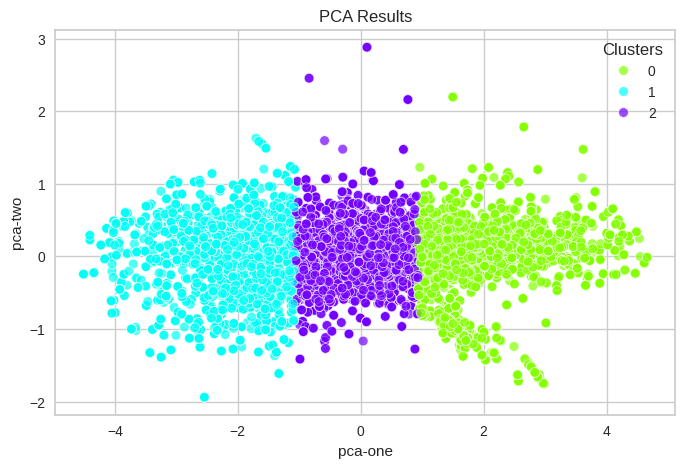

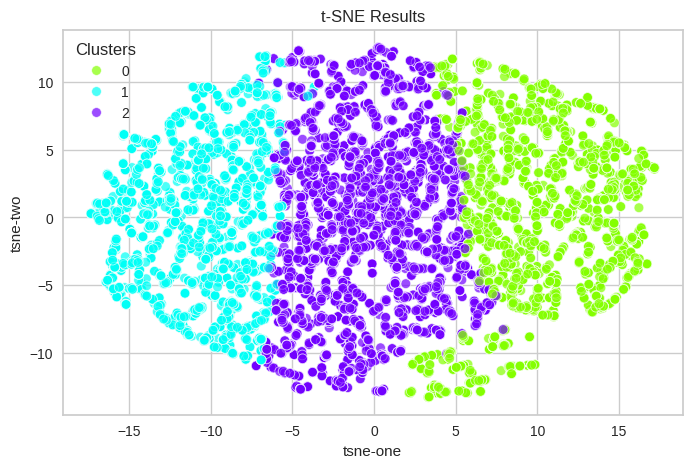

In [18]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_final_preprocessed)
data_with_clusters['pca-one'] = pca_result[:,0]
data_with_clusters['pca-two'] = pca_result[:,1]

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Clusters",
    palette=sns.color_palette("hsv", len(data_with_clusters['Clusters'].unique())),
    data=data_with_clusters,
    legend="full",
    alpha=0.7
)
plt.title('PCA Results')

# t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_final_preprocessed)
data_with_clusters['tsne-one'] = tsne_results[:,0]
data_with_clusters['tsne-two'] = tsne_results[:,1]

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="Clusters",
    palette=sns.color_palette("hsv", len(data_with_clusters['Clusters'].unique())),
    data=data_with_clusters,
    legend="full",
    alpha=0.7
)
plt.title('t-SNE Results')

PCA dan t-SNE dipilih untuk digunakan untuk melihatnya dengan dimensi yang lebih rendah, di mana PCA efektif dalam mereduksi dimensi data dengan mempertahankan varians sebanyak mungkin. PCA bekerja dengan baik jika hubungan antarfitur bersifat linear. Sementara itu, t-SNE juga dipilih karena efektif dalam menangani non-linearitas dalam data, yang mana hal tersebut mungkin tidak terdeteksi dengan PCA.

## Hierarchical

### Fungsi untuk membuat dendogram

In [19]:
def plot_dendrogram(model, **kwargs):
    # Buat linkage matrix dan plot ke dendogramnya

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot
    shc.dendrogram(linkage_matrix, **kwargs)

### Pembuatan model

In [20]:
model = AgglomerativeClustering(distance_threshold = 0, n_clusters = None, linkage = 'ward', affinity = 'euclidean')
clustering = model.fit(data_final_preprocessed)
clustering.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([21323, 21322, 21321, ...,     2,     1,     0])

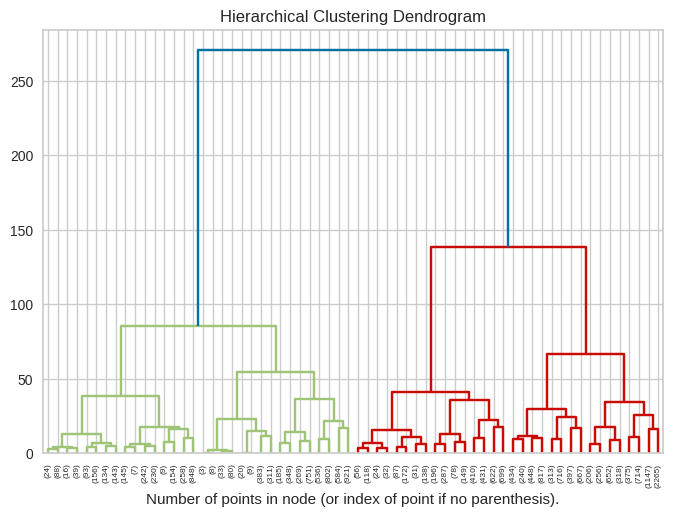

In [21]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode='level', p=5)  # Hanya 5 level terakhir yang ditampilkan, untuk kemudahan visualisasi
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [22]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
data_with_clusters['Agg_clusters'] = clustering.fit_predict(data_final_preprocessed)
data_with_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,roa,roic,roe,Clusters,pca-one,pca-two,tsne-one,tsne-two,Agg_clusters
0,0.066616,0.327124,-0.414794,2,0.010850,-0.530586,0.744664,-6.222904,1
1,0.486796,0.184169,-0.315792,2,-0.208640,-0.391933,-1.327654,-10.162379,1
2,0.688311,0.272375,-0.013577,2,-0.550225,-0.241015,-2.904240,-10.260785,1
3,-0.662268,-0.630977,0.187899,2,0.641401,0.607576,2.845824,10.104587,0
4,-1.871357,-2.647552,-1.503810,0,3.477025,0.784023,16.161348,-3.878049,0
...,...,...,...,...,...,...,...,...,...
21319,-2.107172,0.050339,-2.358349,0,2.552229,-1.631939,8.419673,-11.568378,0
21320,-0.709431,-0.740475,-0.708325,0,1.245969,0.019175,7.076770,2.378992,0
21321,-0.593667,-0.369401,0.286901,2,0.394104,0.501675,1.772862,9.734931,1
21322,-0.212075,-0.287278,-0.060473,2,0.323631,0.161899,2.250395,3.154349,1


### Visualisasi

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 21324 samples in 0.019s...
[t-SNE] Computed neighbors for 21324 samples in 0.781s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21324
[t-SNE] Computed conditional probabilities for sample 2000 / 21324
[t-SNE] Computed conditional probabilities for sample 3000 / 21324
[t-SNE] Computed conditional probabilities for sample 4000 / 21324
[t-SNE] Computed conditional probabilities for sample 5000 / 21324
[t-SNE] Computed conditional probabilities for sample 6000 / 21324
[t-SNE] Computed conditional probabilities for sample 7000 / 21324
[t-SNE] Computed conditional probabilities for sample 8000 / 21324
[t-SNE] Computed conditional probabilities for sample 9000 / 21324
[t-SNE] Computed conditional probabilities for sample 10000 / 21324
[t-SNE] Computed conditional probabilities for sample 11000 / 21324
[t-SNE] Computed conditional probabilities for sample 12000 / 21324
[t-SNE] Computed conditional probabilities for sa

Text(0.5, 1.0, 't-SNE Results')

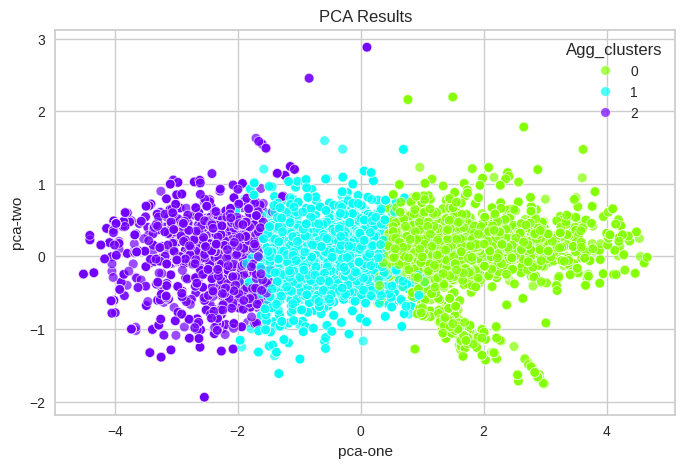

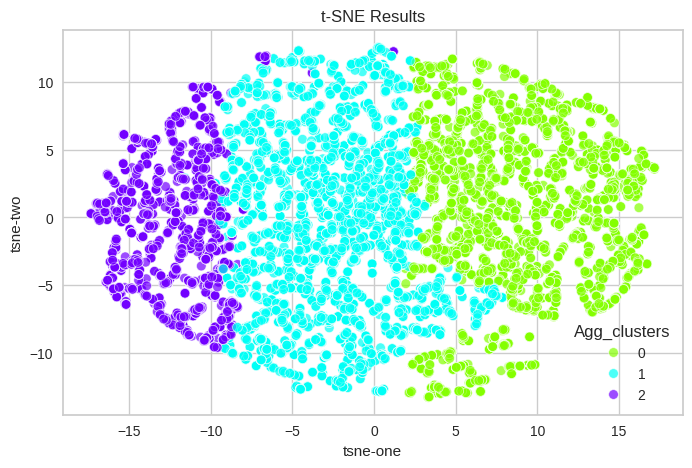

In [23]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_final_preprocessed)
data_with_clusters['pca-one'] = pca_result[:,0]
data_with_clusters['pca-two'] = pca_result[:,1]

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Agg_clusters",
    palette=sns.color_palette("hsv", len(data_with_clusters['Agg_clusters'].unique())),
    data=data_with_clusters,
    legend="full",
    alpha=0.7
)
plt.title('PCA Results')

# t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_final_preprocessed)
data_with_clusters['tsne-one'] = tsne_results[:,0]
data_with_clusters['tsne-two'] = tsne_results[:,1]

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="Agg_clusters",
    palette=sns.color_palette("hsv", len(data_with_clusters['Agg_clusters'].unique())),
    data=data_with_clusters,
    legend="full",
    alpha=0.7
)
plt.title('t-SNE Results')

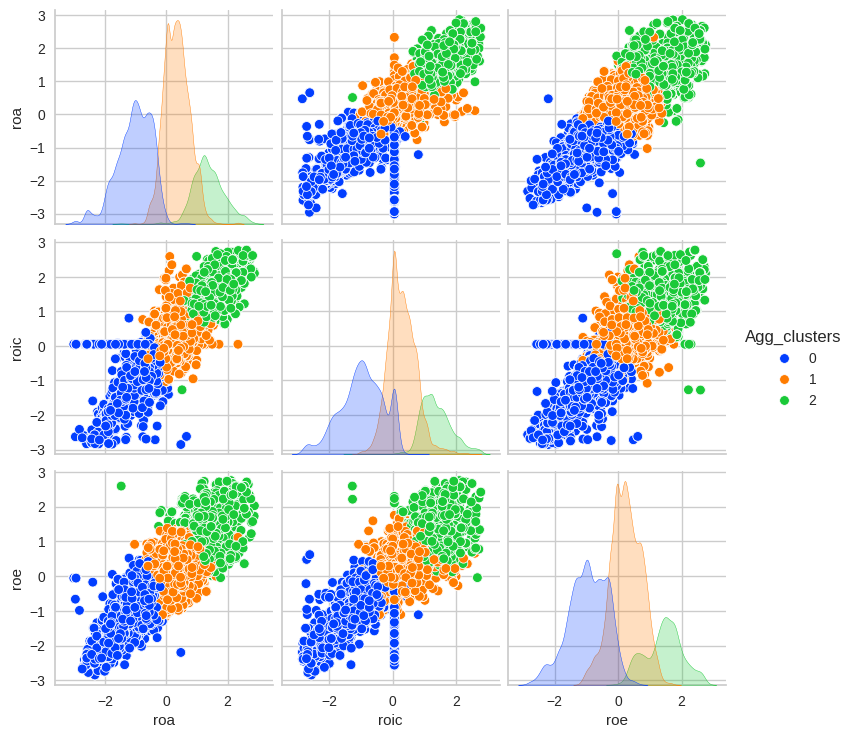

In [24]:
sns.pairplot(data_with_clusters, vars=data_final_preprocessed.columns, hue='Agg_clusters', palette='bright')
plt.show()